In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import folium 


In [2]:
#datasets
dataset = pd.read_csv('DataExtract.csv')

In [3]:
dataset.dtypes

Country                                                            object
Air Quality Network                                                object
Air Quality Network Name                                           object
Air Quality Station EoI Code                                       object
Air Quality Station Name                                           object
Sampling Point Id                                                  object
Air Pollutant                                                      object
Air Pollutant Description                                          object
Data Aggregation Process Id                                        object
Data Aggregation Process                                           object
Year                                                                int64
Air Pollution Level                                               float64
Unit Of Air Pollution Level                                        object
Data Coverage                         

In [4]:
list(dataset.columns)

['Country',
 'Air Quality Network',
 'Air Quality Network Name',
 'Air Quality Station EoI Code',
 'Air Quality Station Name',
 'Sampling Point Id',
 'Air Pollutant',
 'Air Pollutant Description',
 'Data Aggregation Process Id',
 'Data Aggregation Process',
 'Year',
 'Air Pollution Level',
 'Unit Of Air Pollution Level',
 'Data Coverage',
 'Verification',
 'Air Quality Station Type',
 'Air Quality Station Area',
 'Longitude',
 'Latitude',
 'Altitude',
 'City',
 'City Code',
 'City Population',
 'Source Of Data Flow',
 'Calculation Time',
 'Link to raw data (only E1a/validated data from AQ e-Reporting)']

In [5]:
df_dataset = pd.DataFrame(data=dataset)
df_dataset.head()

,Country,Air Quality Network,Air Quality Network Name,Air Quality Station EoI Code,Air Quality Station Name,Sampling Point Id,Air Pollutant,Air Pollutant Description,Data Aggregation Process Id,Data Aggregation Process,...,Air Quality Station Area,Longitude,Latitude,Altitude,City,City Code,City Population,Source Of Data Flow,Calculation Time,Link to raw data (only E1a/validated data from AQ e-Reporting)
0,Serbia,NET-RS002A,Serbian national AQ network,RS0034A,Kikinda,SPO-RS0034A_00001_100,SO2,Sulphur dioxide (air),P1Y-day-max,1 year day max,...,Urban,20.454,45.8215,78.0,NaN,NaN,NaN,E2a/UTD AQ e-Reporting,31/05/2022 20:00:24,NaN
1,Serbia,NET-RS002A,Serbian national AQ network,RS0034A,Kikinda,SPO-RS0034A_00001_100,SO2,Sulphur dioxide (air),P1Y-day-max4,1 year day max 4,...,Urban,20.454,45.8215,78.0,NaN,NaN,NaN,E1a/validated data AQ e-Reporting,31/05/2022 20:55:10,http://fme.discomap.eea.europa.eu/fmedatastrea...
2,Serbia,NET-RS002A,Serbian national AQ network,RS0034A,Kikinda,SPO-RS0034A_00001_100,SO2,Sulphur dioxide (air),P1Y-day-max-per99.18,1 year 99.18 percentile of daily maximum,...,Urban,20.454,45.8215,78.0,NaN,NaN,NaN,E1a/validated data AQ e-Reporting,31/05/2022 20:36:04,http://fme.discomap.eea.europa.eu/fmedatastrea...
3,Serbia,NET-RS002A,Serbian national AQ network,RS0034A,Kikinda,SPO-RS0034A_00001_100,SO2,Sulphur dioxide (air),P1Y-day-min,1 year day min,...,Urban,20.454,45.8215,78.0,NaN,NaN,NaN,E1a/validated data AQ e-Reporting,31/05/2022 20:12:56,http://fme.discomap.eea.europa.eu/fmedatastrea...
4,Serbia,NET-RS002A,Serbian national AQ network,RS0034A,Kikinda,SPO-RS0034A_00001_100,SO2,Sulphur dioxide (air),P1Y-day-per50,1 year 50 %ile of daily values in a year,...,Urban,20.454,45.8215,78.0,NaN,NaN,NaN,E1a/validated data AQ e-Reporting,31/05/2022 20:37:34,http://fme.discomap.eea.europa.eu/fmedatastrea...


In [7]:
locations =df_dataset.filter(['Air Quality Station Name'])
unique_locations = df_dataset['Air Quality Station Name'].unique()
unique_locations


array(['Kikinda', 'Pancevo-Sodara', 'Belgrade-Novi Beograd',
       'Belgrade-Vracar', 'Kostolac', 'Smederevo-Carina', 'Valjevo',
       'Bor-Institut', 'Kragujevac', 'Novi Sad-Rumenacka', 'Nis-IZJZ',
       'Novi Sad-Liman', 'Belgrade-Stari grad',
       'Nis-Osnovna skola Sveti Sava', 'Zajecar', 'Cacak-Institut',
       'Novi Sad 2', 'Pancevo 1', 'Kamenicki vis', 'Bor-Gradski park',
       'Belgrade-Mostar', 'Loznica', 'Krusevac', 'Kopaonik', 'Vranje',
       'Smederevo-Centar', 'Obrenovac-Centar', 'Kosjeric', 'Popovac',
       'Uzice', 'Novi Pazar', 'Belgrade-Bulevar Despota Stefana 54a',
       'Belgrade-Slavija', 'Beocin-Centar',
       'Belgrade-Omladinskih brigada', 'Belgrade-Ohridska', 'Sombor 1',
       'Zrenjanin 1', 'Zrenjanin 2', 'Kikinda 1', 'Kikinda 2', nan,
       'Beocin', 'Novi Sad 1', 'Pancevo 2', 'Subotica 1', 'Subotica 2',
       'Belgrade-Kosutnjak', 'Belgrade-Carli Caplina', 'Krusevac-RHMZ',
       'Smederevska Palanka-RHMZ', 'Valjevo-RHMZ', 'Vranje-RHMZ',
       

In [8]:
unique_years = df_dataset['Year'].unique()
print(sorted(unique_years))


[2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022]


In [10]:
#4reuse
for col in df_dataset:
    print(df_dataset[col].unique())

['Serbia']
['NET-RS002A' 'NET-RS001A' 'NET-RS003A' nan]
['Serbian national AQ network' 'Local AQ network'
 'Air Quality Monitoring System of Belgrade' nan]
['RS0034A' 'RS0035A' 'RS0036A' 'RS0037A' 'RS0038A' 'RS0039A' 'RS0041A'
 'RS0042A' 'RS0043A' 'RS0029A' 'RS0030A' 'RS0031A' 'RS0032A' 'RS0033A'
 'RS0044A' 'RS0045A' 'RS0014A' 'RS0021A' 'RS0005R' 'RS0009A' 'RS0028A'
 'RS0040A' 'RS0046A' 'RS0047A' 'RS0048A' 'RS0050A' 'RS0051A' 'RS0052A'
 'RS0053A' 'RS0054A' 'RS0055A' 'RS0008A' 'RS0027A' 'RS0049A' 'RS0007A'
 'RS0006A' 'RS0015A' 'RS0017A' 'RS0018A' 'RS0019A' 'RS0020A' 'RS0026A'
 'RS0001A' 'RS0002A' 'RS0022A' 'RS0023A' 'RS0024A' 'RS0003A' 'RS0004A'
 'RS0005A' 'RS0010A' 'RS0011A' 'RS0012A' 'RS0013A' 'RS0025A']
['Kikinda' 'Pancevo-Sodara' 'Belgrade-Novi Beograd' 'Belgrade-Vracar'
 'Kostolac' 'Smederevo-Carina' 'Valjevo' 'Bor-Institut' 'Kragujevac'
 'Novi Sad-Rumenacka' 'Nis-IZJZ' 'Novi Sad-Liman' 'Belgrade-Stari grad'
 'Nis-Osnovna skola Sveti Sava' 'Zajecar' 'Cacak-Institut' 'Novi Sad 2'
 '

In [12]:
df2 = df_dataset.drop(columns=['Country', 'Sampling Point Id', 'Data Aggregation Process Id', 'Data Aggregation Process', 'City', 'City Code', 'City Population', 'Link to raw data (only E1a/validated data from AQ e-Reporting)'])
df2


,Air Quality Network,Air Quality Network Name,Air Quality Station EoI Code,Air Quality Station Name,Air Pollutant,Air Pollutant Description,Year,Air Pollution Level,Unit Of Air Pollution Level,Data Coverage,Verification,Air Quality Station Type,Air Quality Station Area,Longitude,Latitude,Altitude,Source Of Data Flow,Calculation Time
0,NET-RS002A,Serbian national AQ network,RS0034A,Kikinda,SO2,Sulphur dioxide (air),2022,43.424,ug/m3,41.10,3.0,Background,Urban,20.4540,45.8215,78.0,E2a/UTD AQ e-Reporting,31/05/2022 20:00:24
1,NET-RS002A,Serbian national AQ network,RS0034A,Kikinda,SO2,Sulphur dioxide (air),2014,22.400,ug/m3,95.89,1.0,Background,Urban,20.4540,45.8215,78.0,E1a/validated data AQ e-Reporting,31/05/2022 20:55:10
2,NET-RS002A,Serbian national AQ network,RS0034A,Kikinda,SO2,Sulphur dioxide (air),2020,14.796,ug/m3,96.17,1.0,Background,Urban,20.4540,45.8215,78.0,E1a/validated data AQ e-Reporting,31/05/2022 20:36:04
3,NET-RS002A,Serbian national AQ network,RS0034A,Kikinda,SO2,Sulphur dioxide (air),2019,1.338,ug/m3,98.63,1.0,Background,Urban,20.4540,45.8215,78.0,E1a/validated data AQ e-Reporting,31/05/2022 20:12:56
4,NET-RS002A,Serbian national AQ network,RS0034A,Kikinda,SO2,Sulphur dioxide (air),2015,4.270,ug/m3,77.53,1.0,Background,Urban,20.4540,45.8215,78.0,E1a/validated data AQ e-Reporting,31/05/2022 20:37:34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12130,NET-RS003A,Air Quality Monitoring System of Belgrade,RS0027A,Belgrade-Slavija,SO2,Sulphur dioxide (air),2012,196.550,ug/m3,98.57,NaN,Traffic,urban,20.4661,44.8008,130.0,Reporting within EoI/AirBase 8,31/12/2012 00:00:00
12131,NET-RS003A,Air Quality Monitoring System of Belgrade,RS0027A,Belgrade-Slavija,NO2,Nitrogen dioxide (air),2011,658.593,ug/m3,87.95,NaN,Traffic,urban,20.4661,44.8008,130.0,Reporting within EoI/AirBase 8,31/12/2012 00:00:00
12132,NET-RS003A,Air Quality Monitoring System of Belgrade,RS0027A,Belgrade-Slavija,NO2,Nitrogen dioxide (air),2009,169.000,ug/m3,83.64,NaN,Traffic,urban,20.4661,44.8008,130.0,Reporting within EoI/AirBase 8,31/12/2012 00:00:00
12133,NET-RS003A,Air Quality Monitoring System of Belgrade,RS0027A,Belgrade-Slavija,CO,Carbon monoxide (air),2011,1.829,mg/m3,85.21,NaN,Traffic,urban,20.4661,44.8008,130.0,Reporting within EoI/AirBase 8,31/12/2012 00:00:00


In [13]:
year_2003 = df2.loc[df2['Year'] == 2003]
year_2004 = df2.loc[df2['Year'] == 2004]
year_2005 = df2.loc[df2['Year'] == 2005]
year_2006 = df2.loc[df2['Year'] == 2006]
year_2007 = df2.loc[df2['Year'] == 2007]
year_2008 = df2.loc[df2['Year'] == 2008]
year_2009 = df2.loc[df2['Year'] == 2009]
year_2010 = df2.loc[df2['Year'] == 2010]
year_2011 = df2.loc[df2['Year'] == 2011]
year_2012 = df2.loc[df2['Year'] == 2012]
year_2013 = df2.loc[df2['Year'] == 2013]
year_2014 = df2.loc[df2['Year'] == 2014]
year_2015 = df2.loc[df2['Year'] == 2015]
year_2016 = df2.loc[df2['Year'] == 2016]
year_2017 = df2.loc[df2['Year'] == 2017]
year_2018 = df2.loc[df2['Year'] == 2018]
year_2019 = df2.loc[df2['Year'] == 2019]
year_2020 = df2.loc[df2['Year'] == 2020]
year_2021 = df2.loc[df2['Year'] == 2021]

In [17]:
year_2003.shape

(175, 18)

In [18]:
year_2004.shape

(352, 18)

In [19]:
year_2005.shape

(376, 18)

In [20]:
year_2006.shape

(364, 18)

In [21]:
year_2007.shape

(352, 18)

In [22]:
year_2008.shape

(314, 18)

In [23]:
year_2009.shape

(276, 18)

In [24]:
year_2010.shape

(386, 18)

In [25]:
year_2011.shape

(655, 18)

In [26]:
year_2012.shape

(681, 18)

In [27]:
year_2013.shape

(741, 18)

In [28]:
year_2014.shape

(631, 18)

In [29]:
year_2015.shape

(764, 18)

In [30]:
year_2016.shape

(550, 18)

In [31]:
year_2017.shape

(529, 18)

In [32]:
year_2018.shape

(733, 18)

In [33]:
year_2019.shape

(1025, 18)

In [34]:
year_2020.shape

(1031, 18)

In [35]:
year_2021.shape

(1094, 18)

<AxesSubplot:>

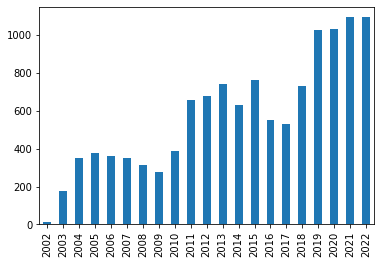

In [36]:
df2.Year.value_counts().plot(kind='bar')

In [42]:
df_2003 = pd.DataFrame(year_2003)
df_2004 = pd.DataFrame(year_2004)
df_2005 = pd.DataFrame(year_2005)
df_2006 = pd.DataFrame(year_2006)
df_2007 = pd.DataFrame(year_2007)
df_2008 = pd.DataFrame(year_2008)
df_2009 = pd.DataFrame(year_2009)
df_2010 = pd.DataFrame(year_2010)
df_2011 = pd.DataFrame(year_2011)
df_2012 = pd.DataFrame(year_2012)
df_2013 = pd.DataFrame(year_2013)
df_2014 = pd.DataFrame(year_2014)
df_2015 = pd.DataFrame(year_2015)
df_2016 = pd.DataFrame(year_2016)
df_2017 = pd.DataFrame(year_2017)
df_2018 = pd.DataFrame(year_2018)
df_2019 = pd.DataFrame(year_2019)
df_2020 = pd.DataFrame(year_2020)
df_2021 = pd.DataFrame(year_2021)



In [74]:
locations_2015 = df_2015.filter(['Air Quality Station Name'])
unique_locations_2015 = df_2015['Air Quality Station Name'].unique()
locations_2016 = df_2016.filter(['Air Quality Station Name'])
unique_locations_2016 = df_2016['Air Quality Station Name'].unique()
locations_2017 = df_2017.filter(['Air Quality Station Name'])
unique_locations_2017 = df_2017['Air Quality Station Name'].unique()
locations_2018 = df_2018.filter(['Air Quality Station Name'])
unique_locations_2018 = df_2018['Air Quality Station Name'].unique()
locations_2019 = df_2019.filter(['Air Quality Station Name'])
unique_locations_2019 = df_2019['Air Quality Station Name'].unique()
locations_2020 = df_2020.filter(['Air Quality Station Name'])
unique_locations_2020 = df_2020['Air Quality Station Name'].unique()
locations_2021 = df_2021.filter(['Air Quality Station Name'])
unique_locations_2021 = df_2021['Air Quality Station Name'].unique()

In [79]:
#2015-2021
#no of locations in last 6 years
for i in (unique_locations_2015, unique_locations_2016, unique_locations_2017, unique_locations_2018, unique_locations_2019, unique_locations_2020, unique_locations_2021):
    brloc6 = len(i)
    print(brloc6)

#names of air stations in last 6 years
for i in (df_2015, df_2016, df_2017, df_2018, df_2019, df_2020, df_2021):
    uniloc6 = i['Air Quality Station Name'].unique()
    print(sorted(uniloc6))

#last 6 years: pollutants
for i in (df_2015, df_2016, df_2017, df_2018, df_2019, df_2020, df_2021):
    unipol6 = i['Air Pollutant '].unique()
    print(sorted(unipol6))


25
20
19
20
22
22
28
['Belgrade-Bulevar Despota Stefana 54a', 'Belgrade-Mostar', 'Belgrade-Novi Beograd', 'Belgrade-Omladinskih brigada', 'Belgrade-Slavija', 'Belgrade-Stari grad', 'Belgrade-Vracar', 'Bor-Gradski park', 'Bor-Institut', 'Cacak-Institut', 'Kamenicki vis', 'Kikinda', 'Kostolac', 'Kragujevac', 'Krusevac', 'Nis-IZJZ', 'Nis-Osnovna skola Sveti Sava', 'Novi Sad 2', 'Novi Sad-Liman', 'Novi Sad-Rumenacka', 'Pancevo 1', 'Smederevo-Carina', 'Valjevo', 'Vranje', 'Zajecar']
['Belgrade-Mostar', 'Belgrade-Novi Beograd', 'Belgrade-Stari grad', 'Bor-Gradski park', 'Bor-Institut', 'Cacak-Institut', 'Kamenicki vis', 'Kikinda', 'Kostolac', 'Kragujevac', 'Krusevac', 'Nis-IZJZ', 'Nis-Osnovna skola Sveti Sava', 'Novi Sad 2', 'Novi Sad-Liman', 'Novi Sad-Rumenacka', 'Smederevo-Carina', 'Valjevo', 'Vranje', 'Zajecar']
['Belgrade-Mostar', 'Belgrade-Novi Beograd', 'Belgrade-Stari grad', 'Belgrade-Vracar', 'Bor-Gradski park', 'Bor-Institut', 'Cacak-Institut', 'Kamenicki vis', 'Kikinda', 'Kostolac'

In [78]:
#2019-2021
#no of locations in last 3 years
for i in (unique_locations_2019, unique_locations_2020, unique_locations_2021):
    brloc3 = len(i)
    print(brloc3)

#names of air stations in last 3 years
for i in (df_2019, df_2020, df_2021):
    uniqloc3 = i['Air Quality Station Name'].unique()
    print(sorted(uniqloc3))

#last 3 years: pollutants
for i in (df_2019, df_2020, df_2021):
    unipol3 = i['Air Pollutant'].unique()
    print(sorted(unipol3))



22
22
28
['Belgrade-Mostar', 'Belgrade-Novi Beograd', 'Belgrade-Stari grad', 'Belgrade-Vracar', 'Bor-Gradski park', 'Bor-Institut', 'Cacak-Institut', 'Kamenicki vis', 'Kikinda', 'Kopaonik', 'Kostolac', 'Kragujevac', 'Krusevac', 'Nis-IZJZ', 'Nis-Osnovna skola Sveti Sava', 'Novi Sad-Liman', 'Novi Sad-Rumenacka', 'Pancevo-Sodara', 'Smederevo-Carina', 'Valjevo', 'Vranje', 'Zajecar']
['Belgrade-Mostar', 'Belgrade-Novi Beograd', 'Belgrade-Stari grad', 'Belgrade-Vracar', 'Bor-Gradski park', 'Bor-Institut', 'Cacak-Institut', 'Kamenicki vis', 'Kikinda', 'Kopaonik', 'Kostolac', 'Kragujevac', 'Krusevac', 'Nis-IZJZ', 'Nis-Osnovna skola Sveti Sava', 'Novi Sad-Liman', 'Novi Sad-Rumenacka', 'Pancevo-Sodara', 'Smederevo-Carina', 'Valjevo', 'Vranje', 'Zajecar']
['Belgrade-Mostar', 'Belgrade-Novi Beograd', 'Belgrade-Stari grad', 'Belgrade-Vracar', 'Beocin-Centar', 'Bor-Institut', 'Cacak-Institut', 'Kamenicki vis', 'Kikinda', 'Kopaonik', 'Kosjeric', 'Kostolac', 'Kragujevac', 'Krusevac', 'Nis-IZJZ', 'Nis-

In [92]:
#EDA last 3 years
#ne radi
#izbacivanje 6 lokacija iz df2021
df_2021_2 = df_2021.drop(df_2021["Air Quality Station Name"].loc[df_2021["Air Quality Station Name"]=='Beocin-Centar'].index)
df_2021_2 = df_2021.drop(df_2021["Air Quality Station Name"].loc[df_2021["Air Quality Station Name"]=='Kosjeric'].index)
df_2021_2 = df_2021.drop(df_2021["Air Quality Station Name"].loc[df_2021["Air Quality Station Name"]=='Novi Pazar'].index)
df_2021_2 = df_2021.drop(df_2021["Air Quality Station Name"].loc[df_2021["Air Quality Station Name"]=='Obrenovac-Centar'].index)
df_2021_2 = df_2021.drop(df_2021["Air Quality Station Name"].loc[df_2021["Air Quality Station Name"]=='Popovac'].index)
df_2021_2 = df_2021.drop(df_2021["Air Quality Station Name"].loc[df_2021["Air Quality Station Name"]=='Uzice'].index)


df_2021_2 

,Air Quality Network,Air Quality Network Name,Air Quality Station EoI Code,Air Quality Station Name,Air Pollutant,Air Pollutant Description,Year,Air Pollution Level,Unit Of Air Pollution Level,Data Coverage,Verification,Air Quality Station Type,Air Quality Station Area,Longitude,Latitude,Altitude,Source Of Data Flow,Calculation Time
18,NET-RS002A,Serbian national AQ network,RS0034A,Kikinda,O3,Ozone (air),2021,14.667,count,100.00,3.0,Background,Urban,20.4540,45.8215,78.0,Mixed E1a/validated and E2a/UTD data AQ e-Repo...,31/05/2022 20:59:44
35,NET-RS002A,Serbian national AQ network,RS0036A,Belgrade-Novi Beograd,PM10,Particulate matter < 10 µm (aerosol),2021,25.925,ug/m3,93.63,3.0,Background,Urban,20.4002,44.8032,74.0,E2a/UTD AQ e-Reporting,31/05/2022 20:29:07
39,NET-RS002A,Serbian national AQ network,RS0036A,Belgrade-Novi Beograd,O3,Ozone (air),2021,17878.968,ug/m3,85.78,3.0,Background,Urban,20.4002,44.8032,74.0,E2a/UTD AQ e-Reporting,31/05/2022 21:34:18
64,NET-RS002A,Serbian national AQ network,RS0037A,Belgrade-Vracar,SO2,Sulphur dioxide (air),2021,17.822,ug/m3,94.14,3.0,Background,Urban,20.4753,44.7970,141.0,Mixed E1a/validated and E2a/UTD data AQ e-Repo...,31/05/2022 21:16:40
69,NET-RS002A,Serbian national AQ network,RS0037A,Belgrade-Vracar,O3,Ozone (air),2021,44.927,ug/m3,93.82,3.0,Background,Urban,20.4753,44.7970,141.0,E2a/UTD AQ e-Reporting,31/05/2022 19:24:45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8176,NET-RS002A,Serbian national AQ network,RS0050A,Smederevo-Centar,PM10,Particulate matter < 10 µm (aerosol),2021,359.836,ug/m3,83.18,3.0,Traffic,Urban,20.9267,44.6641,NaN,E2a/UTD AQ e-Reporting,31/05/2022 20:14:43
8177,NET-RS002A,Serbian national AQ network,RS0050A,Smederevo-Centar,PM10,Particulate matter < 10 µm (aerosol),2021,72.372,ug/m3,82.74,3.0,Traffic,Urban,20.9267,44.6641,NaN,E2a/UTD AQ e-Reporting,31/05/2022 20:33:41
8180,NET-RS002A,Serbian national AQ network,RS0052A,Kosjeric,PM2.5,Particulate matter < 2.5 µm (aerosol),2021,234.127,ug/m3,77.83,3.0,Background,Suburban,19.9052,44.0029,NaN,E2a/UTD AQ e-Reporting,31/05/2022 20:14:43
8184,NET-RS002A,Serbian national AQ network,RS0055A,Novi Pazar,PM10,Particulate matter < 10 µm (aerosol),2021,110.203,ug/m3,91.78,3.0,Background,Urban,20.5164,43.1397,NaN,E2a/UTD AQ e-Reporting,31/05/2022 20:33:41


In [93]:
#TEST
ul_2021 = df_2021_2 ['Air Quality Station Name'].unique()
print(sorted(ul_2021))


['Belgrade-Mostar', 'Belgrade-Novi Beograd', 'Belgrade-Stari grad', 'Belgrade-Vracar', 'Beocin-Centar', 'Bor-Institut', 'Cacak-Institut', 'Kamenicki vis', 'Kikinda', 'Kopaonik', 'Kosjeric', 'Kostolac', 'Kragujevac', 'Krusevac', 'Nis-IZJZ', 'Nis-Osnovna skola Sveti Sava', 'Novi Pazar', 'Novi Sad-Liman', 'Novi Sad-Rumenacka', 'Obrenovac-Centar', 'Pancevo-Sodara', 'Popovac', 'Smederevo-Carina', 'Smederevo-Centar', 'Valjevo', 'Vranje', 'Zajecar']
